In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [3]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#cabin has more null values. So let's drop cabin column
titanic_df = titanic_df.drop(columns=["Cabin"],axis=1)

In [5]:
# Age
titanic_df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [6]:
#Now, Let's fill all the missing values to proceed for our analysis
def Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        elif Pclass==3:
            return 25.14
    else:
        return Age

In [7]:
titanic_df["Age"]=titanic_df[["Age","Pclass"]].apply(Age,axis=1)

In [8]:
titanic_df.groupby("Pclass")["Embarked"].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [9]:
# fill most frequent string in Embarked column
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="most_frequent")
titanic_df[["Embarked"]]=impute.fit_transform(titanic_df[["Embarked"]])

In [10]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualization

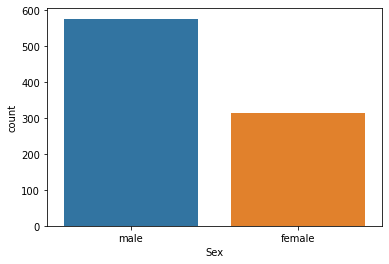

In [11]:
# Let's first check gender
sns.countplot('Sex',data=titanic_df)
plt.show()

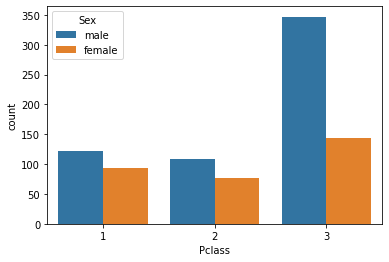

In [12]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.countplot('Pclass',data=titanic_df,hue='Sex')
plt.show()

In [13]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

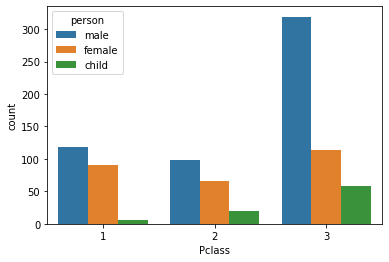

In [14]:
sns.countplot('Pclass',data=titanic_df,hue='person')
plt.show()

In [15]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [16]:
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp

In [17]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [18]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone


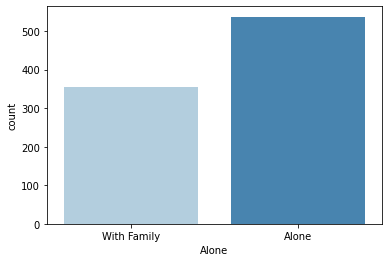

In [19]:
# Now let's get a simple visualization!
sns.countplot('Alone',data=titanic_df,palette='Blues')
plt.show()

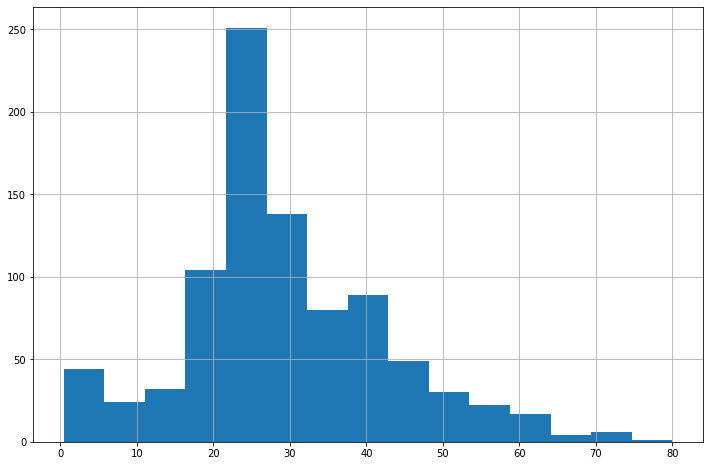

In [20]:
#To see how age is distributed
titanic_df["Age"].hist(figsize=(12,8),bins=15)
plt.show()

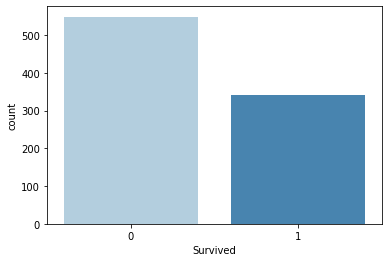

In [21]:
# Let's just get a quick overall view of survied vs died.
sns.countplot('Survived',data=titanic_df,palette='Blues')
plt.show()

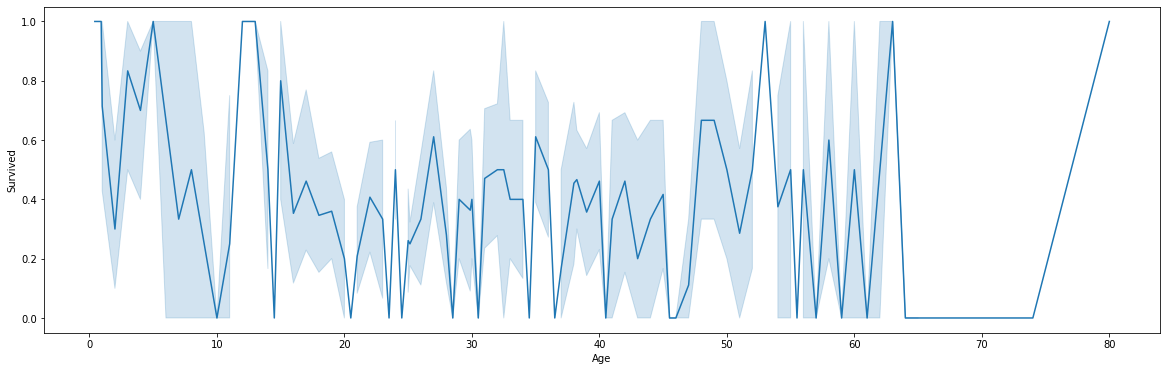

In [22]:
#survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x='Age', y='Survived', data=titanic_df)
plt.show()

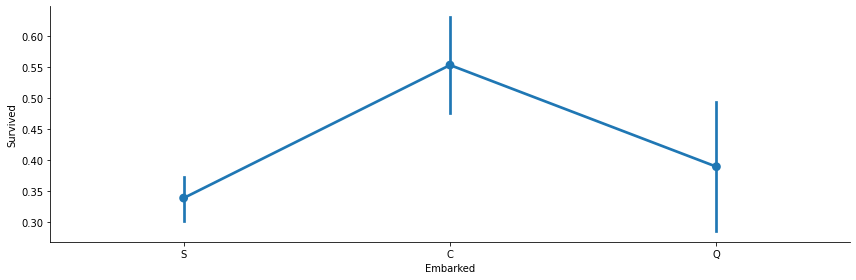

In [23]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)
plt.show()

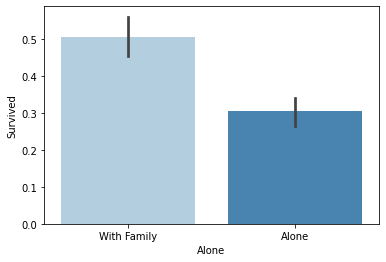

In [24]:
sns.barplot(x='Alone',y="Survived",data=titanic_df,palette='Blues')
plt.show()

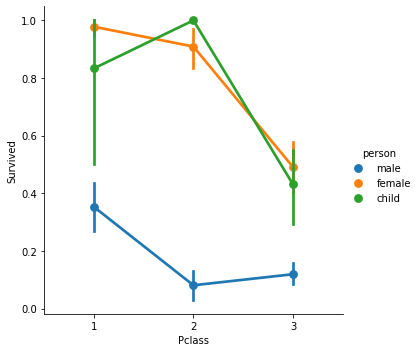

In [25]:
# considering class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)
plt.show()

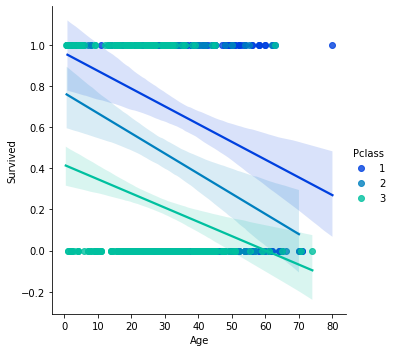

In [26]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')
plt.show()

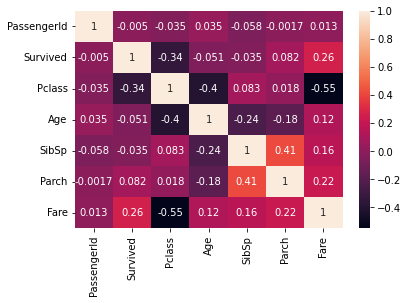

In [27]:
sns.heatmap(titanic_df.corr(),annot=True)
plt.show()

# Predictive Analysis

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone


In [30]:
titanic_df["Sex"].replace({"male":1,"female":0},inplace=True)

In [32]:
titanic_df["Embarked"].replace({"S":1,"C":2,"Q":3},inplace=True)

In [35]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,female,With Family
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,male,Alone


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x= titanic_df[["Pclass","Embarked","Sex","Age","SibSp","Parch"]]

In [38]:
y = titanic_df[["Survived"]]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
Logreg = LogisticRegression()

In [42]:
Logreg.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred = Logreg.predict(x_test)

In [69]:
Logreg.score(x_test,y_test)*100

81.71641791044776

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,y_pred)

array([[139,  23],
       [ 30,  76]], dtype=int64)

In [51]:
(142+77)/(142+20+29+77)*100

81.71641791044776

# Now use RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RFC = RandomForestClassifier()

In [54]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = RFC.predict(x_test)

In [68]:
RFC.score(x_train,y_train)*100

93.73996789727127

# Now use naiveBayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
GNB = GaussianNB()

In [60]:
GNB.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred = GNB.predict(x_test)

In [72]:
GNB.score(x_train,y_train)*100

78.97271268057786

In [78]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(Logreg.coef_[0])

In [80]:
# preview
coeff_df[0:6]

,Features,Coefficient Estimate
0,Survived,-1.181773
1,Pclass,0.166240
2,Name,-2.593282
3,Sex,-0.038003
4,Age,-0.262059
5,SibSp,-0.008029
